In [321]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy

In [322]:
dados_para_conversao_urbano = pd.read_excel('microregiao_salvador.xlsx')

G = nx.DiGraph()
print(len(dados_para_conversao_urbano))
for (index, item) in dados_para_conversao_urbano.iterrows():
    G.add_node(item[1])

408


In [329]:
edges = []
for (index, item) in dados_para_conversao_urbano.iterrows():
    for index2, item2 in dados_para_conversao_urbano.iterrows():
        if(item['Código da Escola'] != item2['Código da Escola']):
            quantidade_de_associacoes = 0
            
            if(item['COMBINAÇÃO'] == item2['COMBINAÇÃO']):
                quantidade_de_associacoes = quantidade_de_associacoes+1

            if(item['Subgrupo'] == item2['Subgrupo']):
                quantidade_de_associacoes = quantidade_de_associacoes+1

            if(quantidade_de_associacoes > 0):
                e = ((item[1]), (item2[1]), quantidade_de_associacoes)
                edges.append(e)

G.add_weighted_edges_from(edges)
print(G.number_of_nodes())


TypeError: 'int' object is not iterable

In [324]:
print(G.number_of_nodes())
print(len(edges))

400
28962


In [325]:
# countRemoved = 0

# for index, item in enumerate(edges):
#     countIgual = 0

#     fromPrimeiro = item[0]
#     toPrimeiro = item[1]

#     for index2, item2 in enumerate(edges):
#         fromSegundo = item2[0]
#         toSegundo = item2[1]

#         if ((fromPrimeiro == fromSegundo and toPrimeiro == toSegundo) 
#         or 
#         (fromPrimeiro == toSegundo and toPrimeiro == fromSegundo)):
#             countIgual = countIgual+1

#         if countIgual > 1 :
#             edges.remove(item2)
#             countRemoved = countRemoved+1
#     countIgual = 0
# print(countRemoved)

In [326]:
print(len(edges))
print(G.number_of_nodes())

28962
400


In [327]:
nx.write_gexf(G, 'item.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')

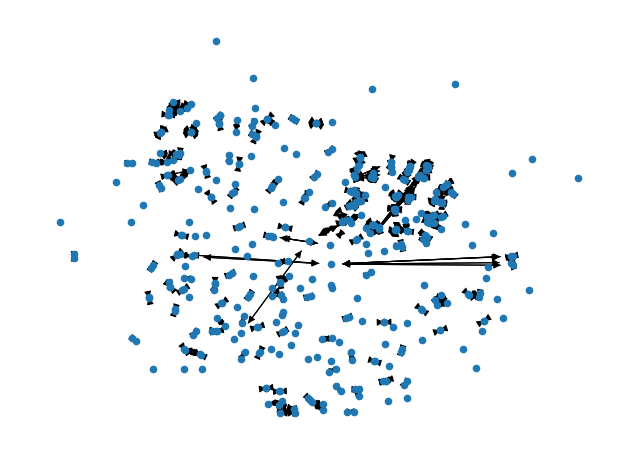

In [328]:

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=20)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=.8)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()